In [13]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples, noise= 0.03, random_state = 42)

In [53]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


In [14]:
import pandas as pd

circles = pd.DataFrame({'X1':X[:,1],'X2':X[:,1], 'label':y})
circles.head(10)

,X1,X2,label
0,0.231481,0.231481,1
1,0.153259,0.153259,1
2,0.173282,0.173282,1
3,0.692883,0.692883,1
4,-0.896723,-0.896723,0
5,0.676435,0.676435,1
6,0.803349,0.803349,1
7,0.147760,0.147760,1
8,-0.793456,-0.793456,1
9,1.021509,1.021509,0


In [15]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

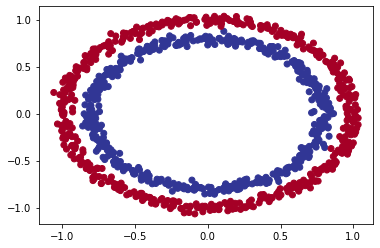

In [16]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], y =X[:,1], c = y, cmap= plt.cm.RdYlBu)

In [17]:
X.shape, y.shape

((1000, 2), (1000,))

In [18]:
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]



(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [19]:
X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)


(800, 200, 800, 200)

In [23]:
import torch
import torch.nn as nn

device = 'mps' if torch.backends.mps.is_available() else 'cpu'
device

'mps'

In [56]:
class CircleModel(nn.Module):
    def __init__(self):
        super(CircleModel, self).__init__()
        self.layer_1 = nn.Linear(in_features= 2, out_features = 10)
        self.layer_2 = nn.Linear(in_features= 10, out_features = 10)
        self.layer_3 = nn.Linear(in_features= 10, out_features = 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model = CircleModel().to(device)
model

CircleModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [57]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr = 0.1)

In [58]:
def accuracy(y_true, y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = correct/len(y_pred)*100
    return acc

In [59]:
torch.manual_seed(42)
epochs = 5000

X_train, y_train = X_train.to(device),y_train.to(device)
X_test, y_test = X_test.to(device),y_test.to(device)

for epoch in range(epochs):
    model.train()
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc  = accuracy(y_train, y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69319, Test acc: 50.00%
Epoch: 10 | Loss: 0.69248, Accuracy: 50.50% | Test loss: 0.69260, Test acc: 50.00%
Epoch: 20 | Loss: 0.69225, Accuracy: 59.13% | Test loss: 0.69231, Test acc: 56.50%
Epoch: 30 | Loss: 0.69209, Accuracy: 70.25% | Test loss: 0.69212, Test acc: 68.00%
Epoch: 40 | Loss: 0.69195, Accuracy: 68.38% | Test loss: 0.69195, Test acc: 71.00%
Epoch: 50 | Loss: 0.69181, Accuracy: 58.25% | Test loss: 0.69177, Test acc: 58.00%
Epoch: 60 | Loss: 0.69168, Accuracy: 54.00% | Test loss: 0.69161, Test acc: 54.50%
Epoch: 70 | Loss: 0.69155, Accuracy: 53.12% | Test loss: 0.69146, Test acc: 53.00%
Epoch: 80 | Loss: 0.69141, Accuracy: 52.62% | Test loss: 0.69132, Test acc: 53.00%
Epoch: 90 | Loss: 0.69128, Accuracy: 52.75% | Test loss: 0.69117, Test acc: 53.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test loss: 0.69102, Test acc: 52.50%
Epoch: 110 | Loss: 0.69103, Accuracy: 52.88% | Test loss: 0.69088, Test acc: 53.50%
Epo

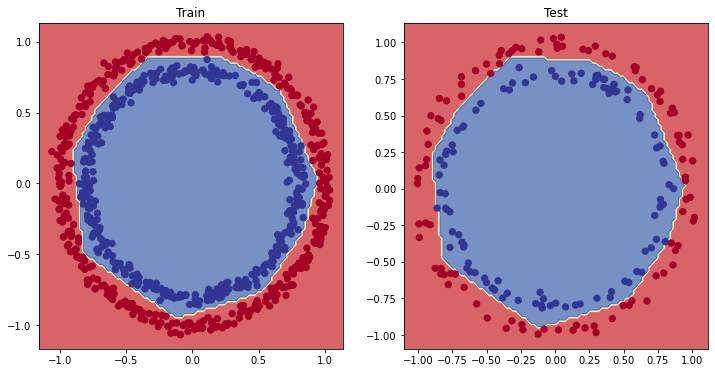

In [60]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)